# Business problem

The goal of this project is to predict the average price of avocados in the United States based on historical data.

# import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
%matplotlib inline

c:\Users\User\Documents\Portfolio Projects\Python Projects\Learning-Portfolio-Projects\Python Projects\Regression\Avocado Buying Trends\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# Get the data

## import csv file

In [3]:
data = pd.read_csv('..\\Dataset\\avocado_data.csv')

# Explore the Data

In [31]:
# Display the first 5 rows
data.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [32]:
# Display the last 5 rows
data.tail()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
53410,2023-12-03,1.550513,5693.91,204.64,1211.25,0.00,4278.03,NaN,NaN,NaN,organic,Toledo
53411,2023-12-03,1.703920,343326.10,66808.44,132075.11,58.65,138830.45,NaN,NaN,NaN,organic,West
53412,2023-12-03,1.618931,34834.86,15182.42,1211.38,0.00,18075.66,NaN,NaN,NaN,organic,WestTexNewMexico
53413,2023-12-03,1.245406,2942.83,1058.54,7.46,0.00,1779.19,NaN,NaN,NaN,organic,Wichita
53414,2023-12-03,1.479240,2010020.72,271808.32,274480.64,63.43,1364514.02,NaN,NaN,NaN,organic,TotalUS


In [50]:
# Chack data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     53415 non-null  float64       
 8   LargeBags     53415 non-null  float64       
 9   XLargeBags    53415 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.9+ MB


In [ ]:
# Chack for missing values
data.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [13]:
# Chack for duplicates
data.duplicated().sum()

np.int64(0)

## Observation

SmallBags, LargeBags, and XLargeBags have 12,390 missing values each

Date is stored as an object (string) and should be converted to a datetime format for better analysis.

There are no duplicates

TotalBags Mismatch: 39,457 rows where TotalBags doesn't match the sum of SmallBags, LargeBags, and XLargeBags.

TotalVolume Mismatch: 38,010 rows where TotalVolume doesn't match the sum of plu4046, plu4225, plu4770, and TotalBags.

# Data Cleaning

## Handle missing values

Since bags can't be negative, we assume missing values indicate no bags sold and fill them with 0

In [35]:
# Fill missing values in 'SmallBags', 'LargeBags', 'XLargeBags' with 0
data[['SmallBags', 'LargeBags', 'XLargeBags']] = data[['SmallBags', 'LargeBags', 'XLargeBags']].fillna(0)

## Validate TotalBags calculation

In [39]:
sum(data['TotalBags'])

5331902186.74

In [ ]:
sum(data['SmallBags']) + sum(data['LargeBags']) + sum(data['XLargeBags'])

5331902186.74

In [ ]:
# Validate 'TotalBags' and fix mismatches
data['TotalBags'] = data['SmallBags'] + data['LargeBags'] + data['XLargeBags']

## Validate TotalVolume calculation

In [44]:
sum(data['TotalVolume'])

34230471694.3

In [45]:
sum(data['plu4046'] )+ sum(data['plu4225']) + sum(data['plu4770']) + sum(data['TotalBags'])

34230471694.300003

In [43]:
# Validate 'TotalVolume' and fix mismatches
data['TotalVolume'] = data['plu4046'] + data['plu4225'] + data['plu4770'] + data['TotalBags']

In [51]:
# Save the cleaned dataset
cleaned_file_path = "..\\Dataset\\avocado_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)

# Explore the Data part 2

In [3]:
avocado_df = pd.read_csv('..\\Dataset\\avocado_cleaned.csv')
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [5]:
avocado_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,53415,2019-07-21 08:27:50.901432320,2015-01-04 00:00:00,2017-05-14 00:00:00,2019-08-04 00:00:00,2021-10-03 00:00:00,2023-12-03 00:00:00,NaN
AveragePrice,53415.0,1.42891,0.44,1.119091,1.4,1.69,3.44083,0.393116
TotalVolume,53415.0,640840.057929,0.0,6418.33,70563.83,321670.905,61034457.1,2712829.162766
plu4046,53415.0,298270.749448,0.0,694.725,14580.58,128792.38,25447201.87,1307669.329406
plu4225,53415.0,222217.037654,0.0,2120.8,17516.63,93515.6,20470572.61,955462.406892
plu4770,53415.0,20531.954686,0.0,0.0,90.05,3599.735,2860025.19,104097.691562
TotalBags,53415.0,99820.316142,0.0,0.0,0.0,21118.01,16298296.29,627824.119005
SmallBags,53415.0,79816.66296,0.0,0.0,0.0,15791.695,12567155.58,500812.280394
LargeBags,53415.0,17905.505117,0.0,0.0,0.0,846.61,4324231.19,131529.297983
XLargeBags,53415.0,2098.148066,0.0,0.0,0.0,0.0,679586.8,19830.138171


## Split the dateset to City Level & Region Level

In [4]:
# Extract the year
avocado_df['Year'] = avocado_df['Date'].dt.year

In [7]:
# Check unique region names
unique_regions = avocado_df['region'].unique()
print(unique_regions)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'Miami' 'Midsouth'
 'Nashville' 'NewOrleans' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'Sacramento' 'SanDiego'
 'SanFrancisco' 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast'
 'Spokane' 'StLouis' 'Syracuse' 'Tampa' 'TotalUS' 'West'
 'WestTexNewMexico' 'BirminghamMontgomery' 'PeoriaSpringfield'
 'Providence' 'Toledo' 'Wichita' 'MiamiFtLauderdale']


In [5]:
# Exclude for the analysis
broad_regions_state = ['TotalUS', 'West', 'SouthCentral', 'Southeast', 'Midsouth', 
                 'GreatLakes', 'Northeast', 'Plains', 'NorthernNewEngland', 'California', 'SouthCarolina']

In [6]:
city_level_data = avocado_df[~avocado_df['region'].isin(broad_regions_state)]
broad_region_data = avocado_df[avocado_df['region'].isin(broad_regions_state)]

In [7]:
city_level_data.shape, broad_region_data.shape

((43163, 13), (10252, 13))

## Data analysis (EDA)

## Volume Analysis

### Total Avocado Sales Per Year

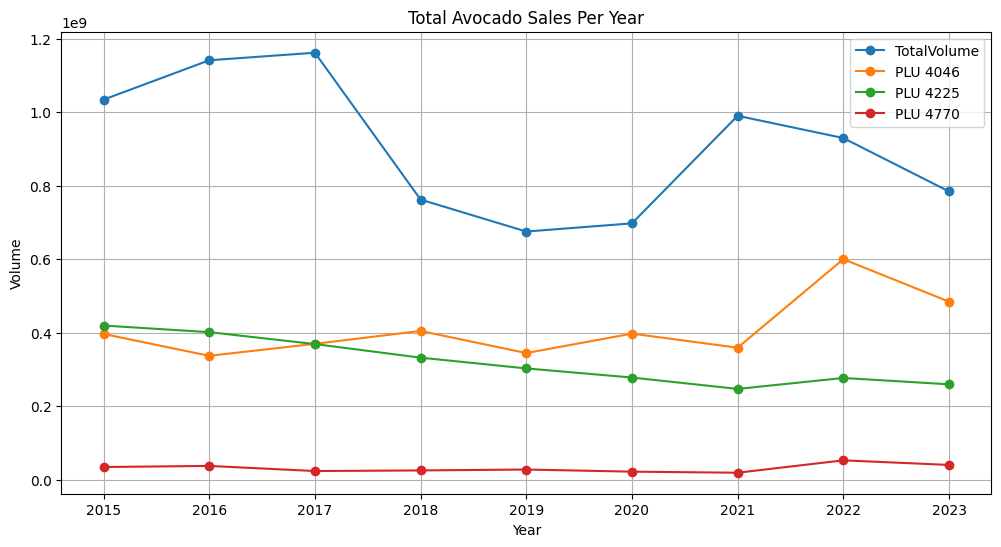

In [10]:
yearly_sales = city_level_data.groupby('Year')[['TotalVolume', 'plu4046', 'plu4225', 'plu4770']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['TotalVolume'], label='TotalVolume', marker='o')
plt.plot(yearly_sales['Year'], yearly_sales['plu4046'], label='PLU 4046', marker='o')
plt.plot(yearly_sales['Year'], yearly_sales['plu4225'], label='PLU 4225', marker='o')
plt.plot(yearly_sales['Year'], yearly_sales['plu4770'], label='PLU 4770', marker='o')

plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Total Avocado Sales Per Year")
plt.legend()
plt.grid(True)
plt.xticks(yearly_sales['Year'])

plt.show()

### Variety of sales per year

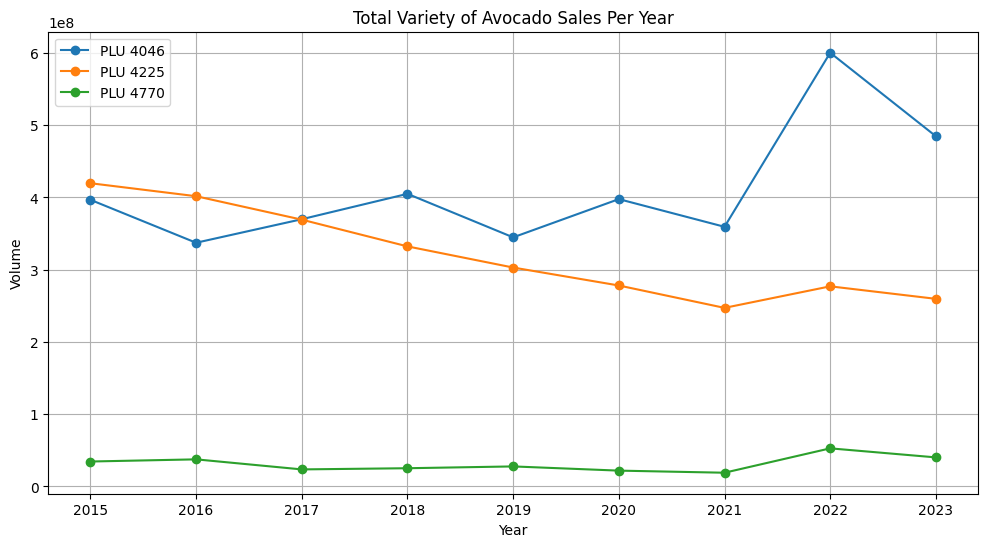

In [11]:
yearly_sales = city_level_data.groupby('Year')[['plu4046', 'plu4225', 'plu4770']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['plu4046'], label='PLU 4046', marker='o')
plt.plot(yearly_sales['Year'], yearly_sales['plu4225'], label='PLU 4225', marker='o')
plt.plot(yearly_sales['Year'], yearly_sales['plu4770'], label='PLU 4770', marker='o')

plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Total Variety of Avocado Sales Per Year")
plt.legend()
plt.grid(True)
plt.xticks(yearly_sales['Year'])

plt.show()

### Top 10 cities

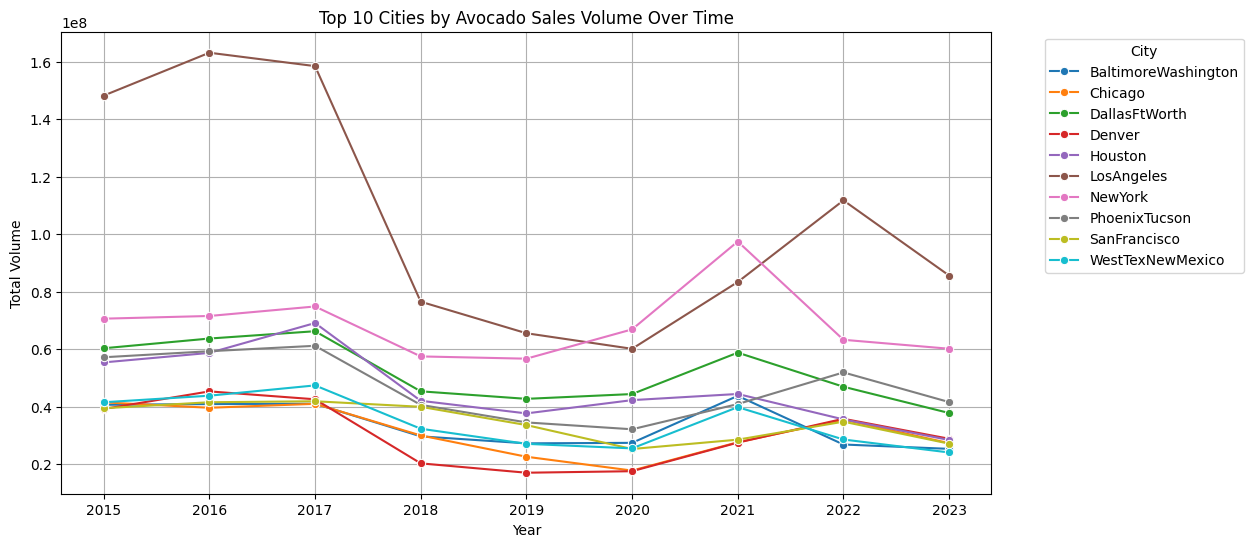

In [12]:
top_cities = (
    city_level_data.groupby('region')['TotalVolume']
    .sum()
    .nlargest(10)
    .index
)

top_cities_data = city_level_data[city_level_data['region'].isin(top_cities)]

yearly_city_sales = top_cities_data.groupby(['Year', 'region'])['TotalVolume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_city_sales, x='Year', y='TotalVolume', hue='region', marker='o')

plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.title("Top 10 Cities by Avocado Sales Volume Over Time")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(yearly_city_sales['Year'].unique())

plt.show()

In [13]:
regional_data = broad_region_data[broad_region_data['region'] != 'TotalUS']

C:\Users\User\AppData\Local\Temp\ipykernel_3228\941527860.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_volume, y='region', x='TotalVolume', palette="viridis")


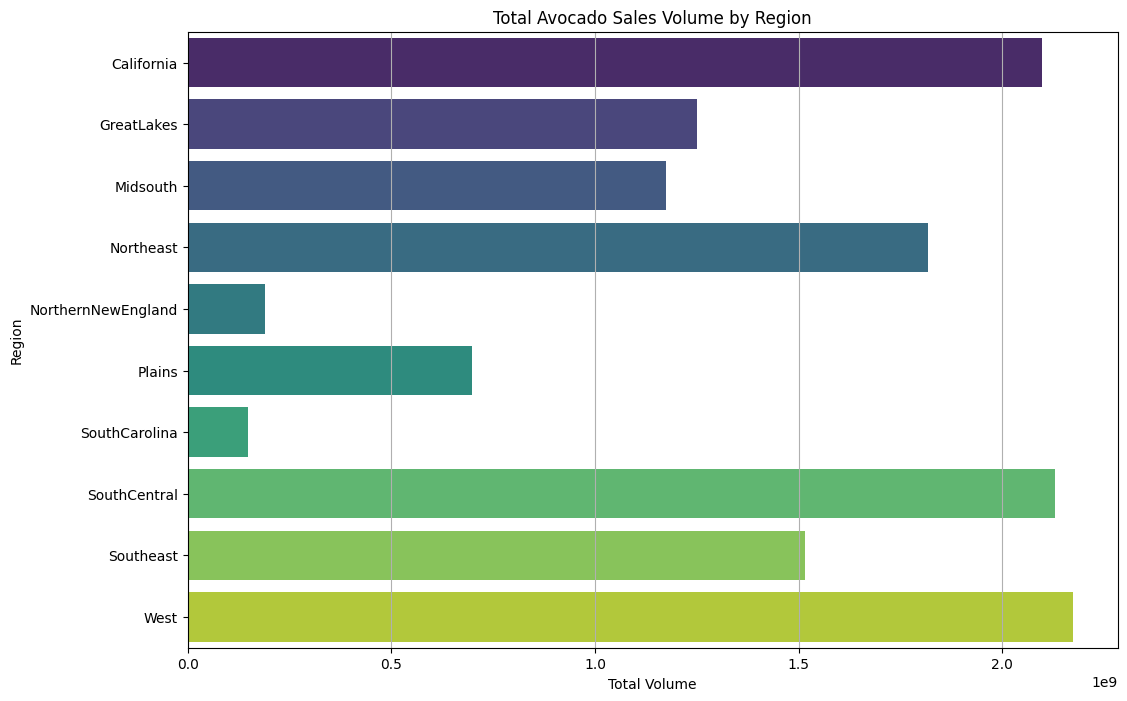

C:\Users\User\AppData\Local\Temp\ipykernel_3228\941527860.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, y='region', x='TotalVolume', palette="magma")


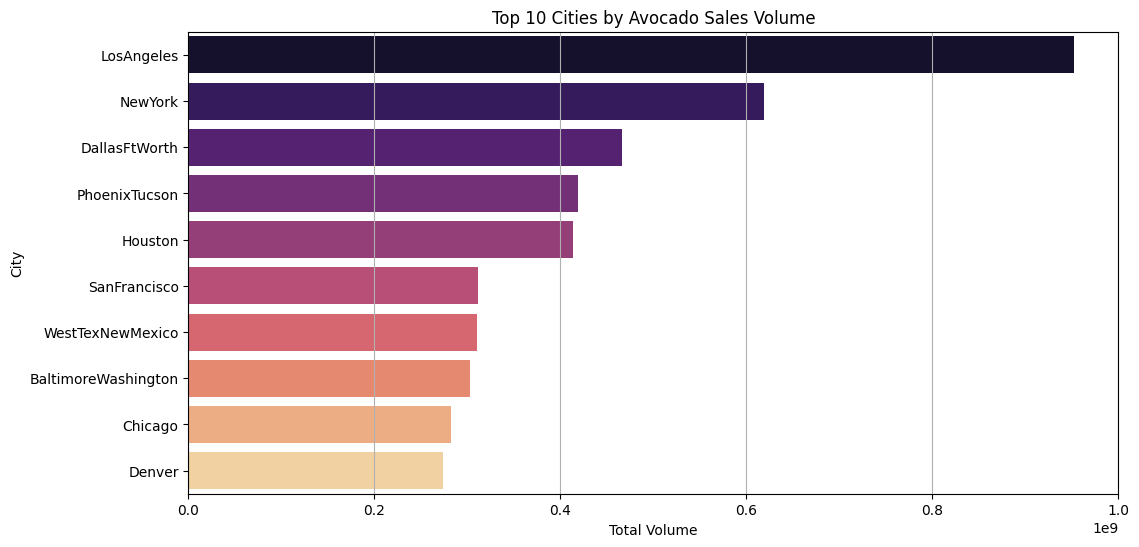

In [14]:
region_volume = regional_data.groupby('region')['TotalVolume'].sum().reset_index()

top_cities = (
    city_level_data.groupby('region')['TotalVolume']
    .sum()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(data=region_volume, y='region', x='TotalVolume', palette="viridis")
plt.xlabel("Total Volume")
plt.ylabel("Region")
plt.title("Total Avocado Sales Volume by Region")
plt.grid(axis='x')

plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, y='region', x='TotalVolume', palette="magma")
plt.xlabel("Total Volume")
plt.ylabel("City")
plt.title("Top 10 Cities by Avocado Sales Volume")
plt.grid(axis='x')

plt.show()

### Organic vs Conventional Sales

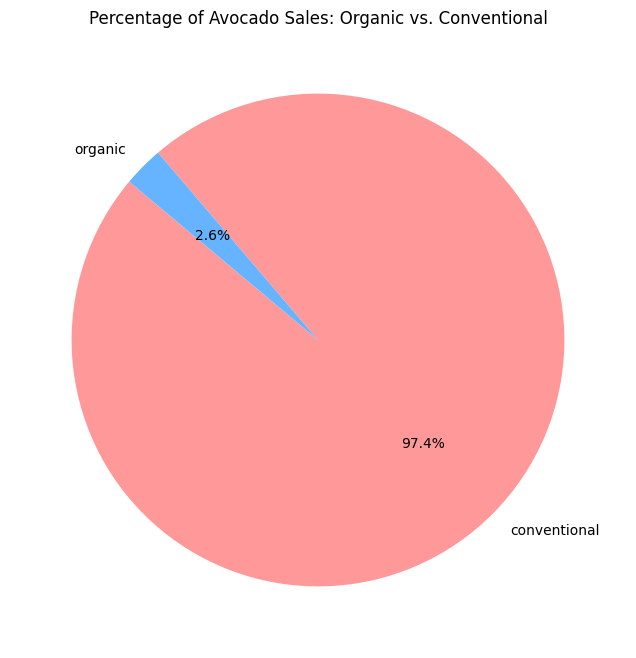

In [15]:
type_volume = city_level_data.groupby('type')['TotalVolume'].sum().reset_index()

type_volume['Percentage'] = (type_volume['TotalVolume'] / type_volume['TotalVolume'].sum()) * 100

plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']  # Color for each type
plt.pie(type_volume['Percentage'], labels=type_volume['type'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Percentage of Avocado Sales: Organic vs. Conventional")
plt.show()

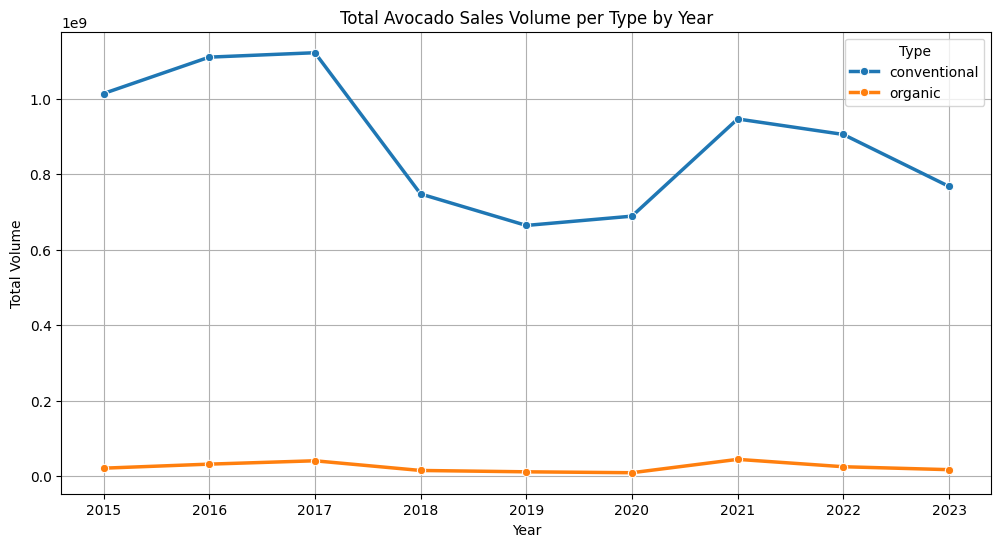

In [16]:
yearly_type_volume = city_level_data.groupby(['Year', 'type'])['TotalVolume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_type_volume, x="Year", y="TotalVolume", hue="type", marker="o", linewidth=2.5)

plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.title("Total Avocado Sales Volume per Type by Year")
plt.legend(title="Type")
plt.grid(True)

plt.show()

### Price Trend Analysis

#### Average Price Trend Over Time

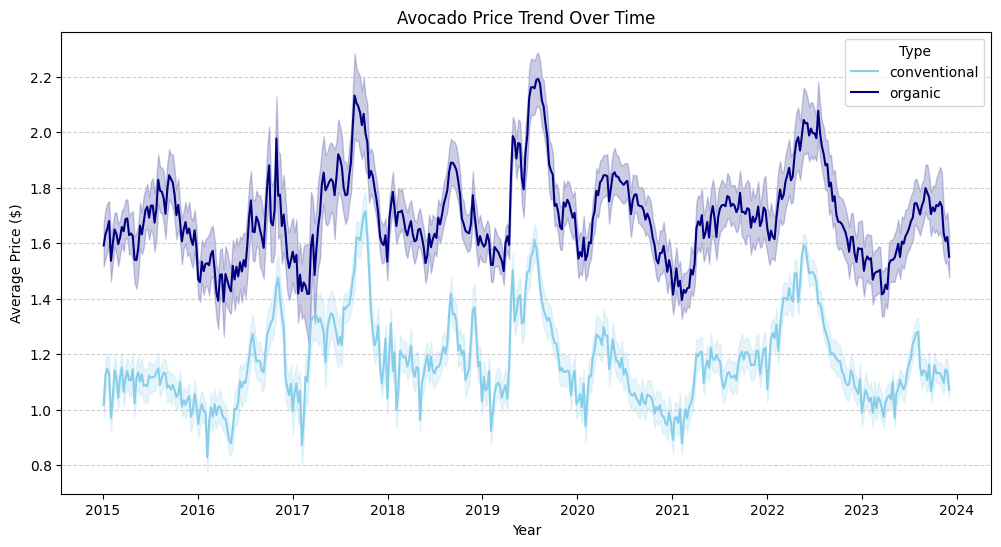

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=city_level_data, x='Date', y='AveragePrice', hue='type', palette=["skyblue", "navy"])
plt.title("Avocado Price Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.legend(title="Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

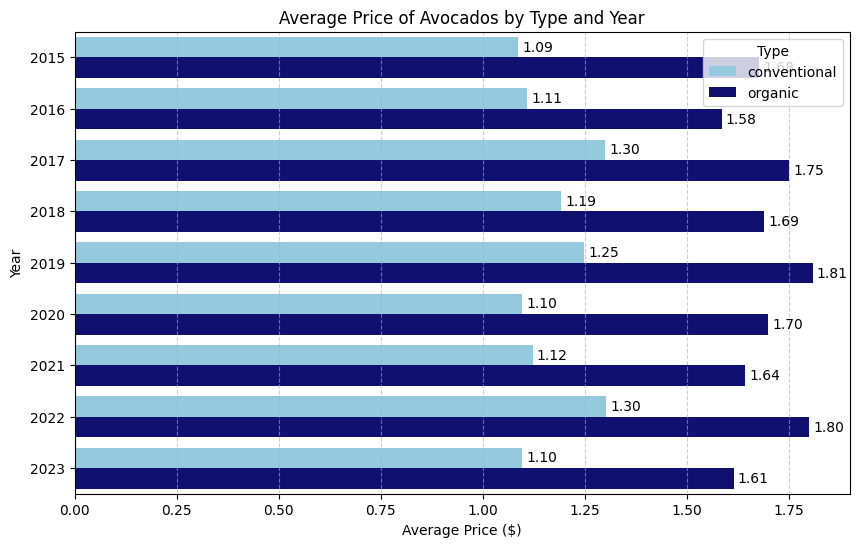

In [18]:
yearly_avg_price = city_level_data.groupby(['Year', 'type'])['AveragePrice'].mean().reset_index()

yearly_avg_price['Year'] = yearly_avg_price['Year'].astype(str)
yearly_avg_price = yearly_avg_price.sort_values(by='Year', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_avg_price, y="Year", x="AveragePrice", hue="type", palette=["skyblue", "navy"])

plt.xlabel("Average Price ($)")
plt.ylabel("Year")
plt.title("Average Price of Avocados by Type and Year")
plt.legend(title="Type", loc="upper right")
plt.grid(axis="x", linestyle="--", alpha=0.6)

for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", padding=3, fontsize=10)

plt.show()

### Seasonal Price Patterns

C:\Users\User\AppData\Local\Temp\ipykernel_3228\3884278836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_level_data['Month'] = city_level_data['Date'].dt.month


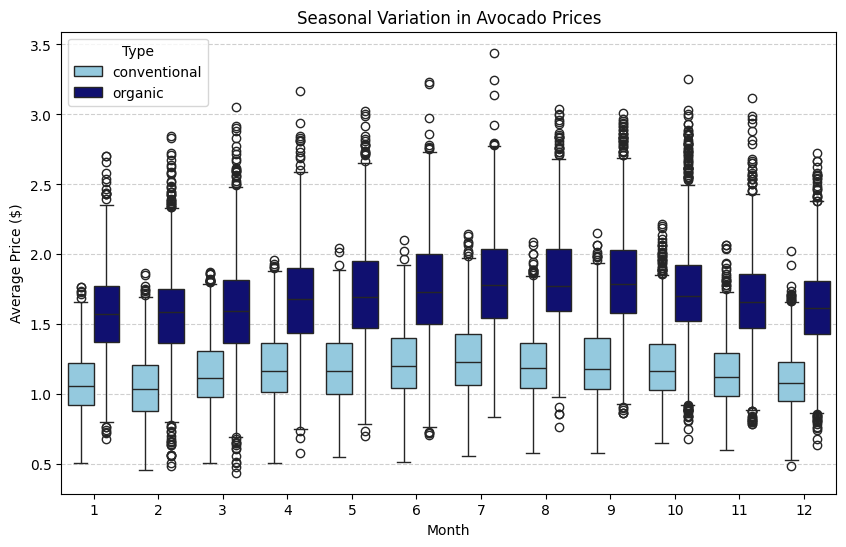

In [19]:
city_level_data['Month'] = city_level_data['Date'].dt.month

plt.figure(figsize=(10,6))
sns.boxplot(data=city_level_data, x="Month", y="AveragePrice", hue="type", palette=["skyblue", "navy"])
plt.title("Seasonal Variation in Avocado Prices")
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.legend(title="Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

type
conventional    1.172991
organic         1.696924
Name: AveragePrice, dtype: float64


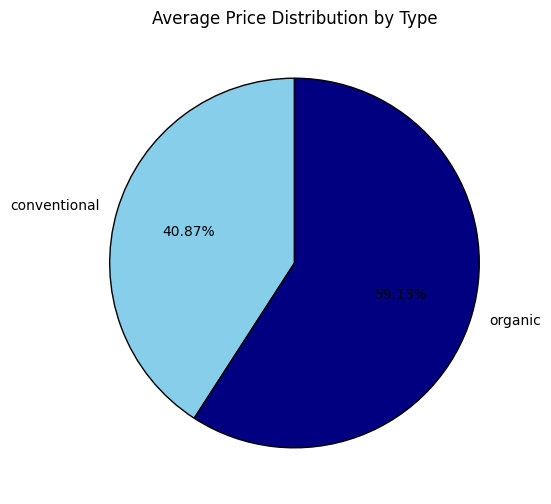

In [20]:
avg_price_by_type = city_level_data.groupby('type')['AveragePrice'].mean()

print(avg_price_by_type)

plt.figure(figsize=(6, 6))
colors = ["skyblue", "navy"]
avg_price_by_type.plot(kind="pie", autopct="%.2f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Average Price Distribution by Type")
plt.ylabel("")

plt.show()

### Regional Price Differences

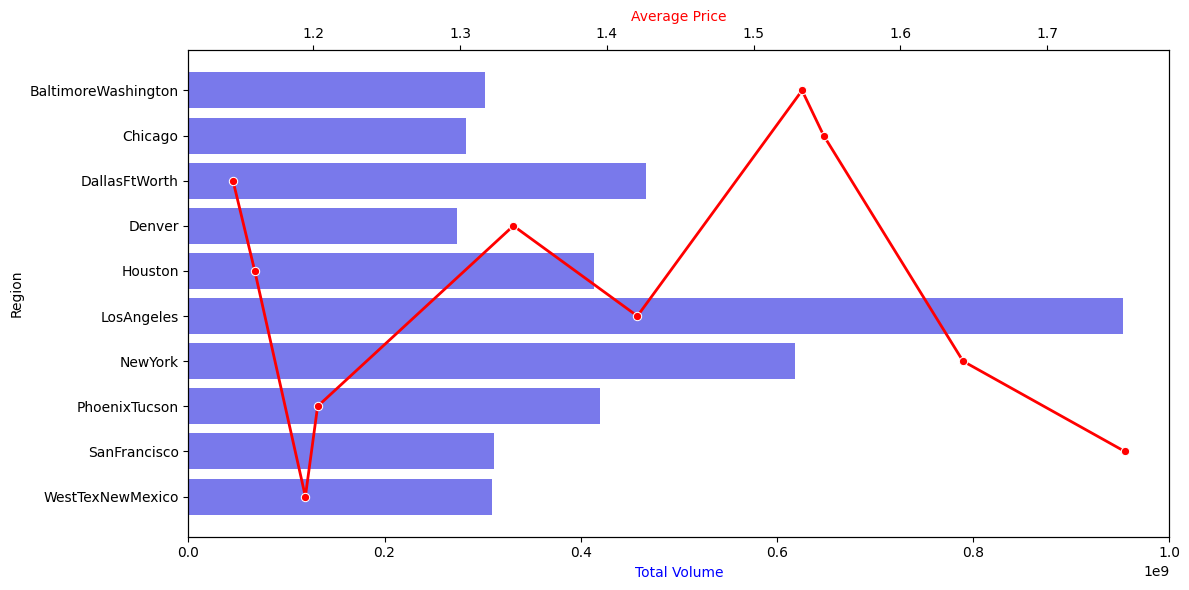

In [21]:
Top_10_cities_volume = ['LosAngeles', 'NewYork', 'DallasFtWorth', 'PhoenixTucson', 'Houston', 'SanFrancisco', 
                        'WestTexNewMexico', 'BaltimoreWashington', 'Chicago', 'Denver']

Top_10_cities = city_level_data[city_level_data['region'].isin(Top_10_cities_volume)]

region_summary = Top_10_cities.groupby('region').agg(
    TotalVolume=('TotalVolume', 'sum'),
    AveragePrice=('AveragePrice', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=region_summary, x='TotalVolume', y='region', ax=ax1, color='blue', alpha=0.6)

ax2 = ax1.twiny()
sns.lineplot(data=region_summary, x='AveragePrice', y='region', ax=ax2, color='red', marker='o', lw=2)

ax1.set_ylabel('Region')
ax1.set_xlabel('Total Volume', color='blue')
ax2.set_xlabel('Average Price', color='red')

plt.tight_layout()
plt.show()

### Volume vs. Price Correlation

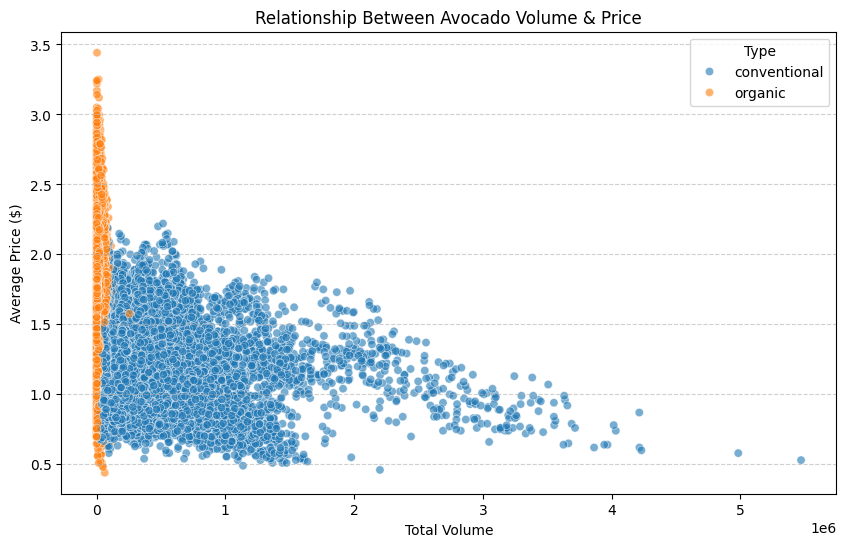

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=city_level_data, x="TotalVolume", y="AveragePrice", hue="type", alpha=0.6)
plt.title("Relationship Between Avocado Volume & Price")
plt.xlabel("Total Volume")
plt.ylabel("Average Price ($)")
plt.legend(title="Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Forecasting Avocado Prices

22:42:19 - cmdstanpy - INFO - Chain [1] start processing
22:42:24 - cmdstanpy - INFO - Chain [1] done processing
22:42:28 - cmdstanpy - INFO - Chain [1] start processing
22:42:29 - cmdstanpy - INFO - Chain [1] done processing
22:42:32 - cmdstanpy - INFO - Chain [1] start processing
22:42:34 - cmdstanpy - INFO - Chain [1] done processing
22:42:37 - cmdstanpy - INFO - Chain [1] start processing
22:42:38 - cmdstanpy - INFO - Chain [1] done processing
22:42:40 - cmdstanpy - INFO - Chain [1] start processing
22:42:41 - cmdstanpy - INFO - Chain [1] done processing
22:42:44 - cmdstanpy - INFO - Chain [1] start processing
22:42:44 - cmdstanpy - INFO - Chain [1] done processing
22:42:47 - cmdstanpy - INFO - Chain [1] start processing
22:42:47 - cmdstanpy - INFO - Chain [1] done processing
22:42:50 - cmdstanpy - INFO - Chain [1] start processing
22:42:51 - cmdstanpy - INFO - Chain [1] done processing
22:42:54 - cmdstanpy - INFO - Chain [1] start processing
22:42:56 - cmdstanpy - INFO - Chain [1]

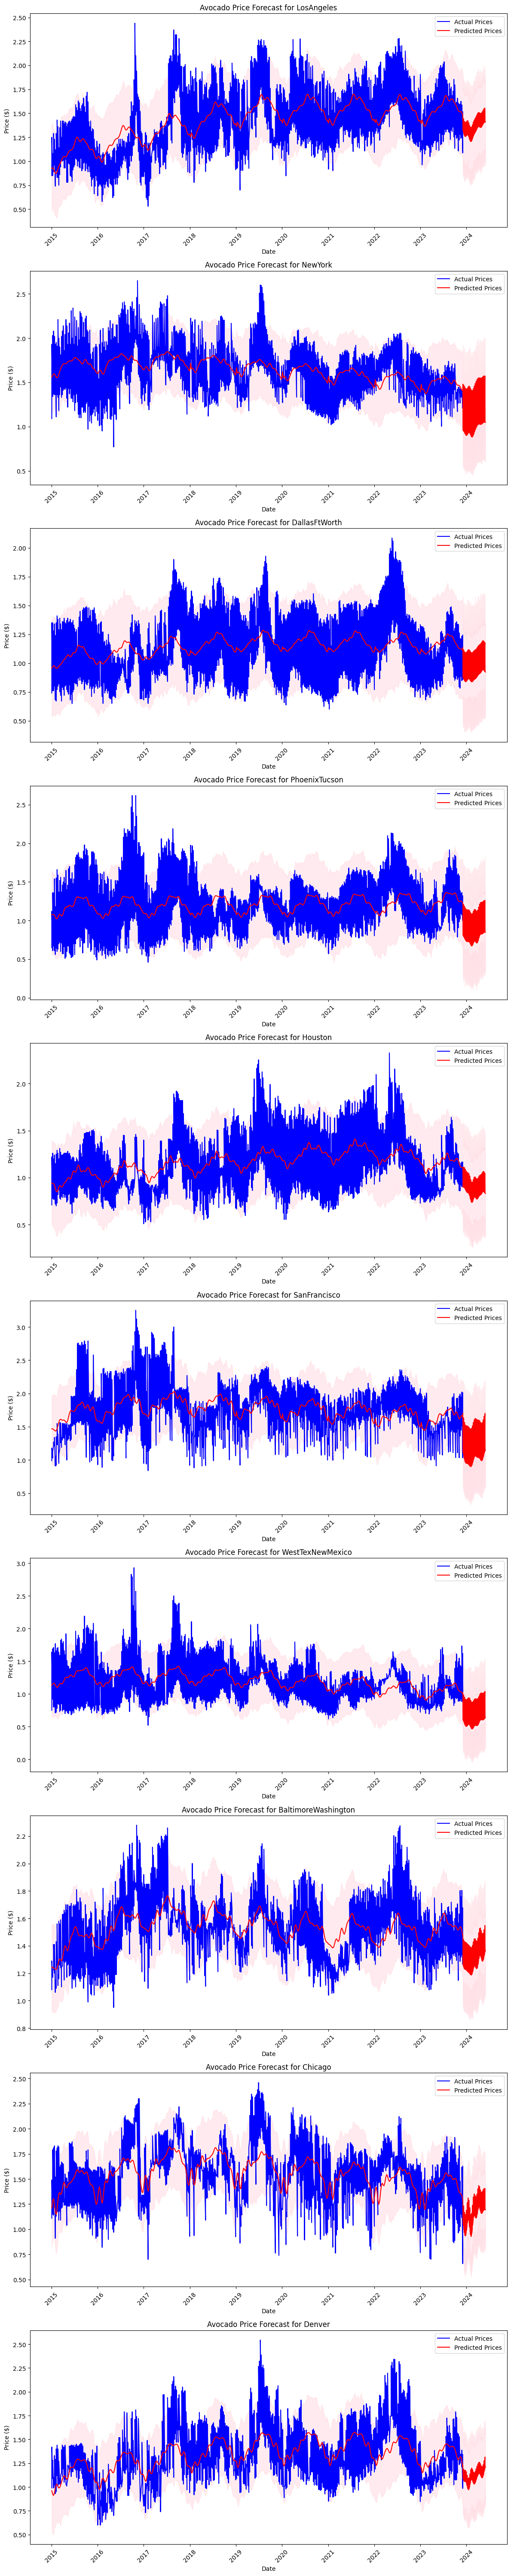

In [25]:
# Step 1: Load your dataset
# avocado_df = pd.read_csv("your_data.csv")  # Uncomment if loading from CSV

# List of cities/regions to forecast
regions_list = ['LosAngeles', 'NewYork', 'DallasFtWorth', 'PhoenixTucson', 'Houston', 'SanFrancisco', 
                        'WestTexNewMexico', 'BaltimoreWashington', 'Chicago', 'Denver']

# Step 2: Create subplots for multiple city forecasts
fig, axes = plt.subplots(len(regions_list), 1, figsize=(12, 6 * len(regions_list)))

for i, region in enumerate(regions_list):
    # Filter data for the selected region
    region_data = city_level_data[city_level_data['region'] == region]

    # Prepare data for Prophet
    prophet_df = region_data[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

    # Train Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Create future dataframe (6 months ahead)
    future = model.make_future_dataframe(periods=180)
    forecast = model.predict(future)

    # Plot the forecast for the current region
    axes[i].plot(prophet_df['ds'], prophet_df['y'], label="Actual Prices", color="blue")
    axes[i].plot(forecast['ds'], forecast['yhat'], label="Predicted Prices", color="red")
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
    
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price ($)")
    axes[i].set_title(f"Avocado Price Forecast for {region}")
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()